In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Abrir os arquivos CSV com as medições feitas utilizando Python
df1 = pd.read_csv('./Arquivos/output/output_Aleatorios.csv', sep=',')
df2 = pd.read_csv('./Arquivos/output/output_Ordenados.csv', sep=',')
df3 = pd.read_csv('./Arquivos/output/output_Decrescentes.csv', sep=',')
df4 = pd.read_csv('./Arquivos/output/output_Parcialmente.csv', sep=',')
# Adicionar cabeçalho aos DataFrames
df1.columns = ['Tamanho', 'Tempo de execução', 'Método','Multithread','Buckets','Execução']
df2.columns = ['Tamanho', 'Tempo de execução', 'Método','Multithread','Buckets','Execução']
df3.columns = ['Tamanho', 'Tempo de execução', 'Método','Multithread','Buckets','Execução']
df4.columns = ['Tamanho', 'Tempo de execução', 'Método','Multithread','Buckets','Execução']


# Concatenar os DataFrames
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Tamanho,Tempo de execução,Método,Multithread,Buckets,Execução
0,100,0.032537,Insertion Sort,Sim,0,1
1,100,0.001001,Bucket Sort,Nao,10,1
2,100,0.000998,Bucket Sort,Nao,100,1
3,100,0.001000,Bucket Sort,Nao,1000,1
4,100,0.034015,Bucket Sort,Sim,10,1
...,...,...,...,...,...,...
1591,30000,0.015034,Bucket Sort,Nao,100,5
1592,30000,0.016162,Bucket Sort,Nao,1000,5
1593,30000,0.045868,Bucket Sort,Sim,10,5
1594,30000,0.032141,Bucket Sort,Sim,100,5


## Estrutura dos Dados

Os dados estão organizados da seguinte forma:
- **Quantidade de Elementos**: Número de elementos ordenados (10.000 em todos os testes)
- **Tempo de Execucao (s)**: Tempo em segundos para completar a ordenação
- **Metodo**: Algoritmo utilizado (Insertion Sort ou Bucket Sort)
- **Multithreading**: Se foi utilizada a versão com multithreading (Sim/Não)
- **Execucao**: Identificador da execução (agrupamento de 4 testes consecutivos)

Vamos analisar o desempenho dos diferentes métodos ao longo das execuções.

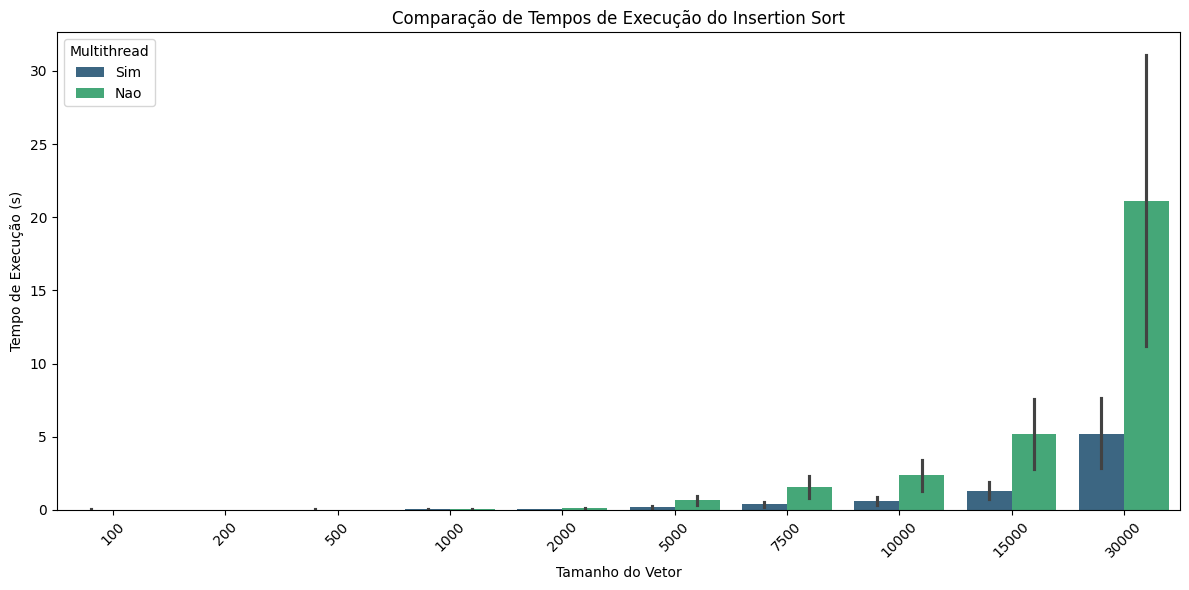

In [28]:
# Comparar os tempos de execução entre os métodos insertion sort com e sem multithreading
df['Tempo de execução'] = df['Tempo de execução'].astype(float)

df_insertion = df[df['Método'] == 'Insertion Sort']
df_insertion_multithread = df_insertion[df_insertion['Multithread'] == 'Sim']
df_insertion_singlethread = df_insertion[df_insertion['Multithread'] == 'Não']
# Plotar os tempos de execução
plt.figure(figsize=(12, 6))
sns.barplot(x='Tamanho', y='Tempo de execução', hue='Multithread', data=df_insertion, palette='viridis')
plt.title('Comparação de Tempos de Execução do Insertion Sort')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Multithread', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_insertion_sort.png')
plt.show()



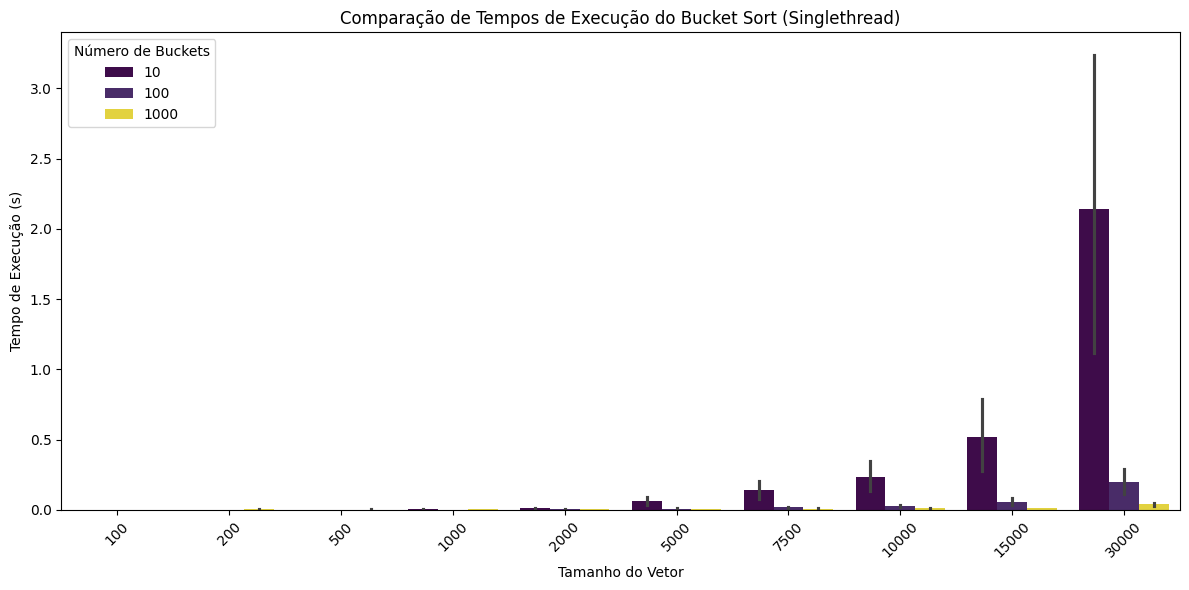

In [38]:
# Comparar o tempo de execução do bucket sort singlethread dependendo do número de buckets
df_bucket = df[df['Método'] == 'Bucket Sort']
df_bucket_singlethread = df_bucket[df_bucket['Multithread'] == 'Nao']

# Plotar os tempos de execução
plt.figure(figsize=(12, 6))
sns.barplot(x='Tamanho', y='Tempo de execução', hue='Buckets', data=df_bucket_singlethread, palette='viridis')
plt.title('Comparação de Tempos de Execução do Bucket Sort (Singlethread)')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Número de Buckets', loc='upper left')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_bucket_sort.png')


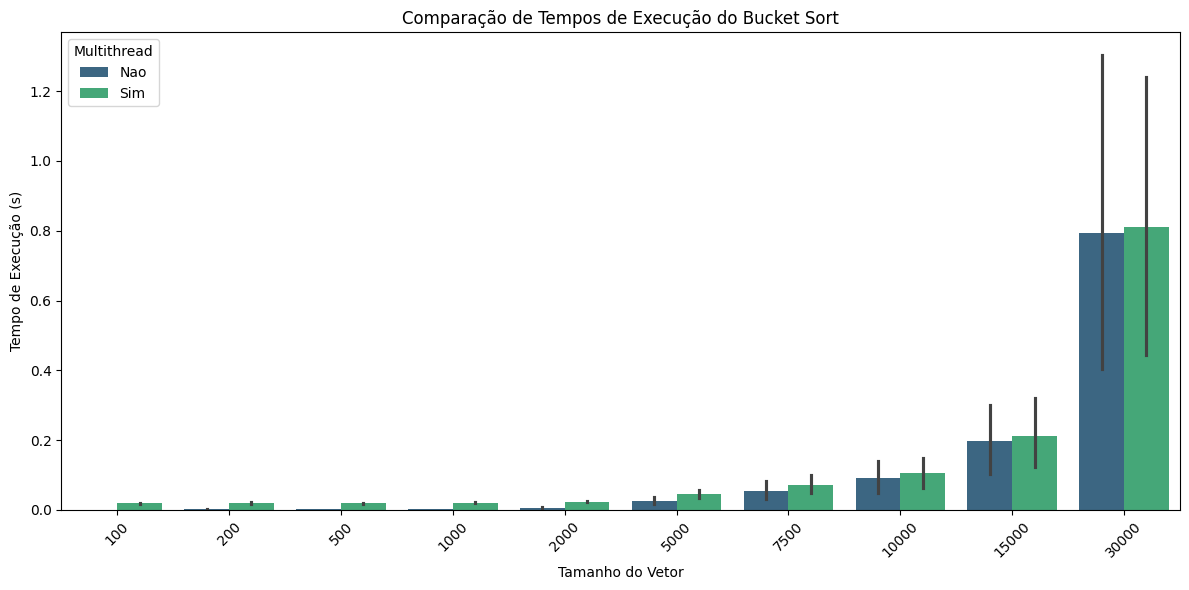

In [42]:
# Comparar os tempos de execução entre os métodos bucket sort com e sem multithreading, mostrando o número de buckets
df_bucket_multithread = df_bucket[df_bucket['Multithread'] == 'Sim']

# Comparar os tempos de execução do bucket sort singlethread e multithread
plt.figure(figsize=(12, 6))
sns.barplot(x='Tamanho', y='Tempo de execução', hue='Multithread', data=df_bucket, palette='viridis')
plt.title('Comparação de Tempos de Execução do Bucket Sort')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Multithread', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_bucket_sort_multithread.png')


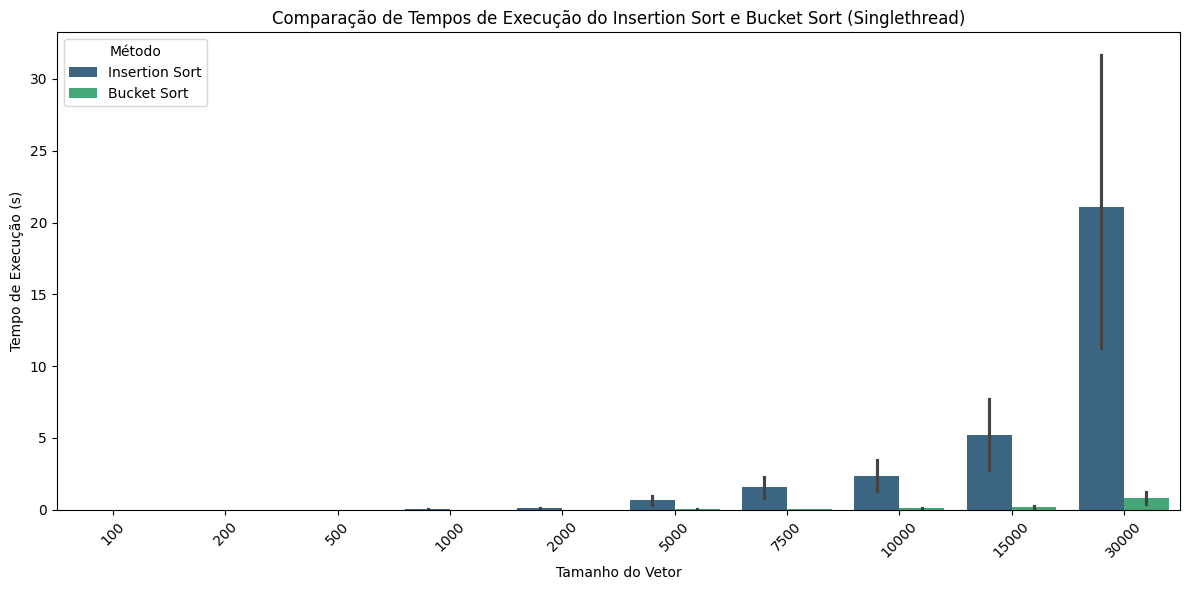

In [ ]:
# Comparar o bucket sort com o insertion sort singlethread
df_insertion_singlethread = df_insertion[df_insertion['Multithread'] == 'Nao']
df_bucket_singlethread = df_bucket_singlethread[df_bucket_singlethread['Multithread'] == 'Nao']
# Plotar os tempos de execução
plt.figure(figsize=(12, 6))
sns.barplot(x='Tamanho', y='Tempo de execução', hue='Método', data=pd.concat([df_insertion_singlethread, df_bucket_singlethread]), palette='viridis')
plt.title('Comparação de Tempos de Execução do Insertion Sort e Bucket Sort (Singlethread)')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Método', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_insertion_bucket_sort.png')

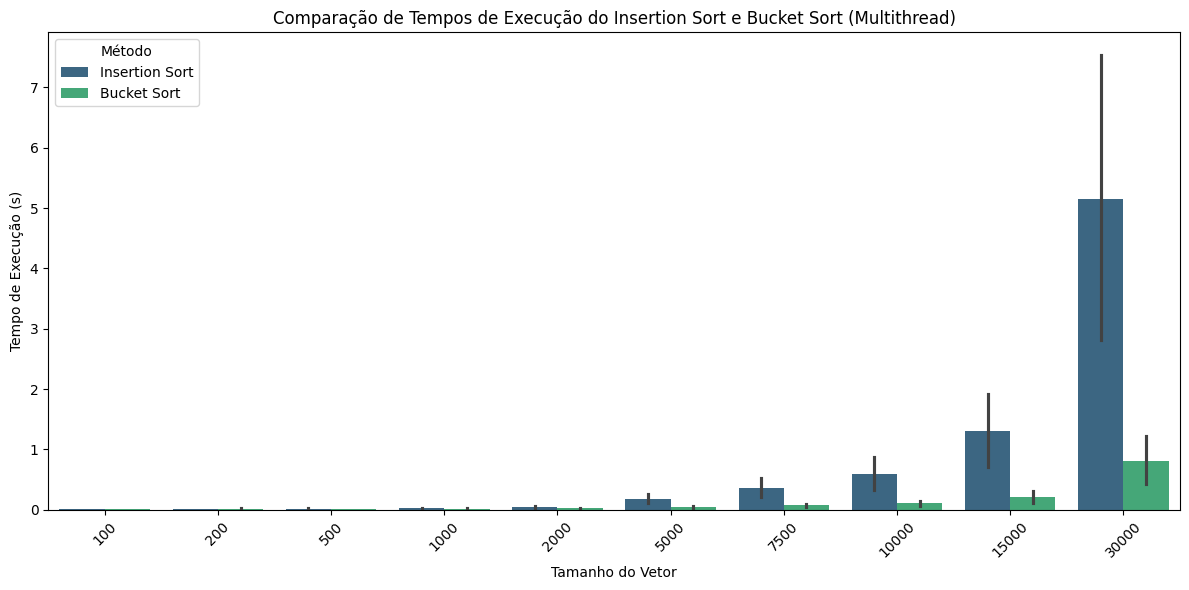

In [48]:
# # Comparar o bucket sort com o insertion sort multithread
df_insertion_multithread = df_insertion[df_insertion['Multithread'] == 'Sim']
df_bucket_multithread = df_bucket_multithread[df_bucket_multithread['Multithread'] == 'Sim']
# Plotar os tempos de execução
plt.figure(figsize=(12, 6))
sns.barplot(x='Tamanho', y='Tempo de execução', hue='Método', data=pd.concat([df_insertion_multithread, df_bucket_multithread]), palette='viridis')
plt.title('Comparação de Tempos de Execução do Insertion Sort e Bucket Sort (Multithread)')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Método', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_insertion_bucket_sort_multithread.png')



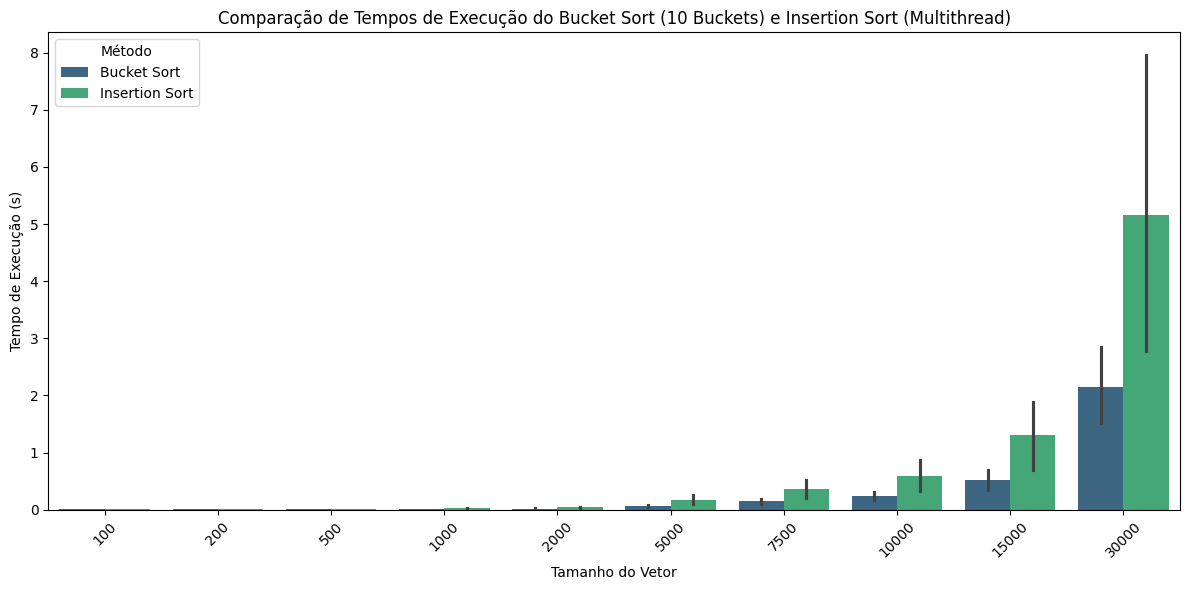

In [52]:
# Comparar o tempo de execução do bucket sort com 10 buckets e o insertion sort multithread
df_bucket_10_buckets = df_bucket[df_bucket['Buckets'] == 10]
df_insertion_multithread = df_insertion[df_insertion['Multithread'] == 'Sim']
# Plotar os tempos de execução
plt.figure(figsize=(12, 6))
sns.barplot(x='Tamanho', y='Tempo de execução', hue='Método', data=pd.concat([df_bucket_10_buckets, df_insertion_multithread]), palette='viridis')
plt.title('Comparação de Tempos de Execução do Bucket Sort (10 Buckets) e Insertion Sort (Multithread)')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Método', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_bucket_10_buckets_insertion_multithread.png')



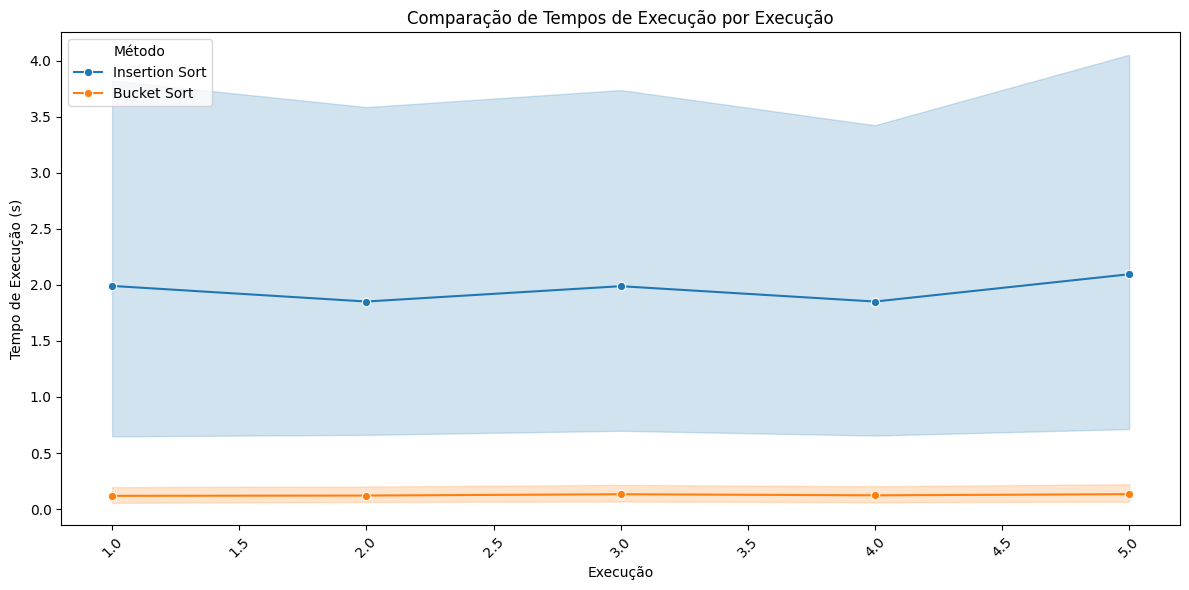

In [55]:
# Comparar os tempos de execução por execução em um grafico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Execução', y='Tempo de execução', hue='Método', data=df, marker='o')
plt.title('Comparação de Tempos de Execução por Execução')
plt.xlabel('Execução')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Método', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_tempos_execucao.png')

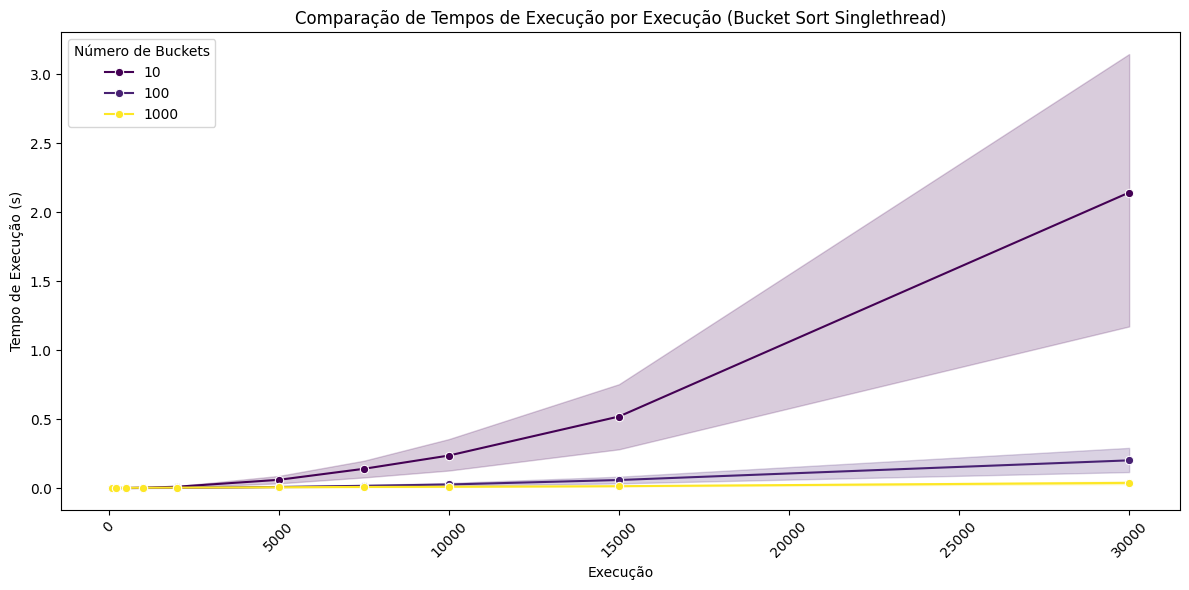

In [59]:
# Comparar os tempos de execução por execução pelo numero de buckets em um grafico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tamanho', y='Tempo de execução', hue='Buckets', data=df_bucket_singlethread, marker='o', palette='viridis')
plt.title('Comparação de Tempos de Execução por Execução (Bucket Sort Singlethread)')
plt.xlabel('Execução')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Número de Buckets', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_tempos_execucao_bucket_singlethread.png')


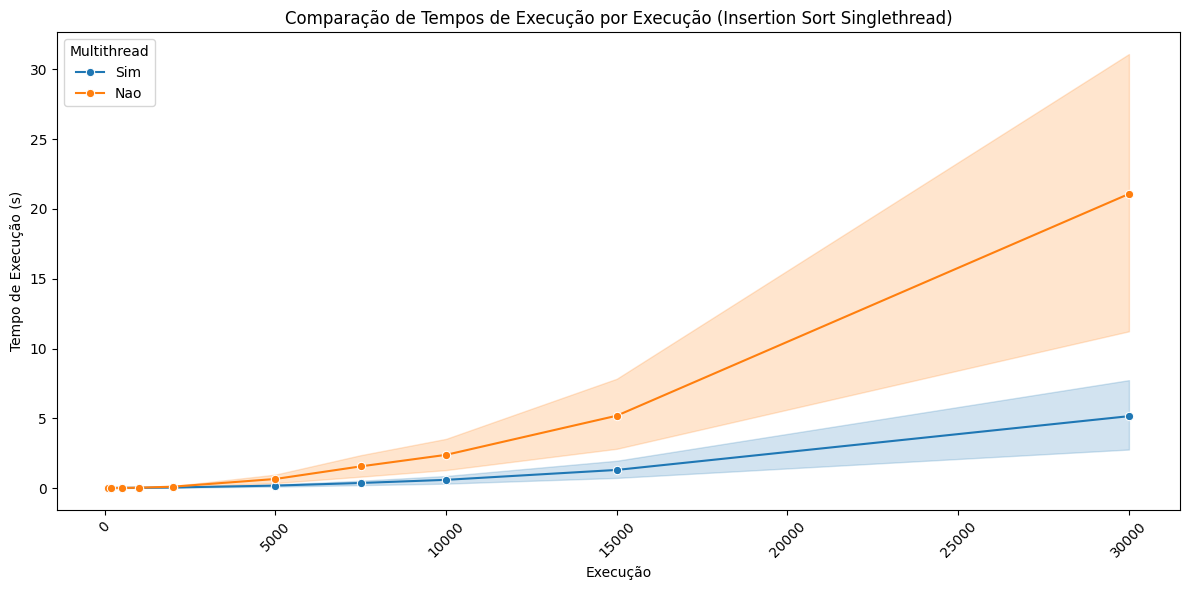

In [ ]:
# Comparar os tempos de execução por execução pelo numero de elementos no insertion sort
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tamanho', y='Tempo de execução', hue='Multithread', data=df_insertion, marker='o')
plt.title('Comparação de Tempos de Execução por Execução (Insertion Sort Singlethread)')
plt.xlabel('Execução')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Multithread', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Arquivos/figuras/comparacao_tempos_execucao_insertion_singlethread')


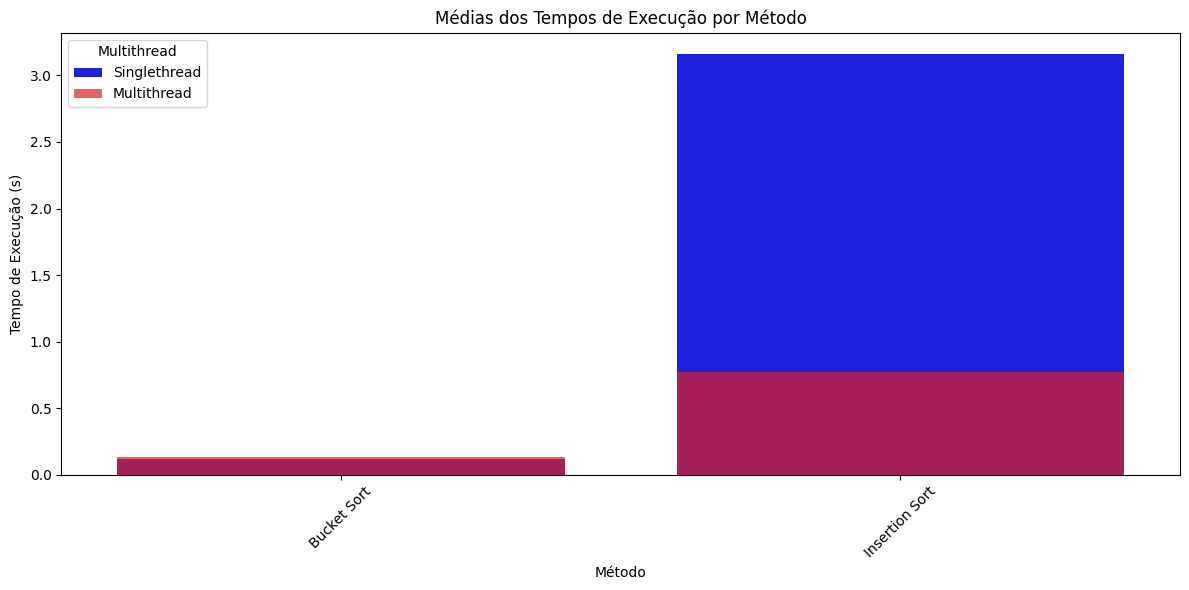

In [66]:
# Calcular médias
df_single = df[df['Multithread'] == 'Nao']
df_multithread = df[df['Multithread'] == 'Sim']
mediasSingle = df_single.groupby('Método')['Tempo de execução'].mean().to_dict()
mediasMultithread = df_multithread.groupby('Método')['Tempo de execução'].mean().to_dict()

# Criar gráfico de barras para médias
plt.figure(figsize=(12, 6))
sns.barplot(x=list(mediasSingle.keys()), y=list(mediasSingle.values()), color='blue', label='Singlethread')
sns.barplot(x=list(mediasMultithread.keys()), y=list(mediasMultithread.values()), color='red', label='Multithread', alpha=0.7)
plt.title('Médias dos Tempos de Execução por Método')
plt.xlabel('Método')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Multithread', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

In [80]:
# Criar DataFrame com as estatísticas
statsSingle = []
statsMultithread = []

for method in df['Método'].unique():
    # Separar o bucketsort em numero de buckets
    if method == 'Bucket Sort':
        for buckets in df['Buckets'].unique():
            if buckets == 0:
                continue
            method_data = df[df['Método'] == method][df['Buckets'] == buckets]
            mean = method_data['Tempo de execução'].mean()
            std = method_data['Tempo de execução'].std()
            min_val = method_data['Tempo de execução'].min()
            max_val = method_data['Tempo de execução'].max()
            
            if method_data['Multithread'].iloc[0] == 'Sim':
                statsMultithread.append({
                    'Método': f'{method} ({buckets} Buckets)',
                    'Média': mean,
                    'Desvio Padrão': std,
                    'Mínimo': min_val,
                    'Máximo': max_val
                })
            else:
                statsSingle.append({
                    'Método': f'{method} ({buckets} Buckets)',
                    'Média': mean,
                    'Desvio Padrão': std,
                    'Mínimo': min_val,
                    'Máximo': max_val
                })
    # Para os outros métodos, calcular as estatísticas normalmente
    if method == 'Insertion Sort':
        method_data = df[df['Método'] == method]
        mean = method_data['Tempo de execução'].mean()
        std = method_data['Tempo de execução'].std()
        min_val = method_data['Tempo de execução'].min()
        max_val = method_data['Tempo de execução'].max()
        
        if method_data['Multithread'].iloc[0] == 'Sim':
            statsMultithread.append({
                'Método': method,
                'Média': mean,
                'Desvio Padrão': std,
                'Mínimo': min_val,
                'Máximo': max_val
            })
        else:
            statsSingle.append({
                'Método': method,
                'Média': mean,
                'Desvio Padrão': std,
                'Mínimo': min_val,
                'Máximo': max_val
            })

# Criar DataFrame com as estatísticas
stats_df = pd.DataFrame(statsSingle)
stats_df



C:\Users\guilh\AppData\Local\Temp\ipykernel_14896\2196270834.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  method_data = df[df['Método'] == method][df['Buckets'] == buckets]
C:\Users\guilh\AppData\Local\Temp\ipykernel_14896\2196270834.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  method_data = df[df['Método'] == method][df['Buckets'] == buckets]
C:\Users\guilh\AppData\Local\Temp\ipykernel_14896\2196270834.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  method_data = df[df['Método'] == method][df['Buckets'] == buckets]


,Método,Média,Desvio Padrão,Mínimo,Máximo
0,Bucket Sort (10 Buckets),0.319026,0.993768,0.0,6.266796
1,Bucket Sort (100 Buckets),0.041315,0.093613,0.0,0.654370
2,Bucket Sort (1000 Buckets),0.016794,0.014828,0.0,0.089531


## Conclusões

Da análise dos resultados, podemos observar:

1. **Bucket Sort vs Insertion Sort**:
   - O Bucket Sort é significativamente mais rápido que o Insertion Sort para conjuntos de 10.000 elementos
   - A diferença de desempenho é de várias ordens de magnitude

2. **Impacto do Multithreading**:
   - No Insertion Sort: o multithreading não trouxe ganhos significativos
   - No Bucket Sort: o multithreading parece ter adicionado um pequeno overhead, tornando-o ligeiramente mais lento

3. **Estabilidade dos Algoritmos**:
   - Os tempos de execução são relativamente consistentes entre as diferentes execuções
   - O Bucket Sort apresenta maior variabilidade relativa no tempo de execução

4. **Considerações Práticas**:
   - Para conjuntos de dados desta magnitude (10.000 elementos), o Bucket Sort é claramente a escolha superior
   - A implementação com multithreading precisa ser otimizada para trazer benefícios reais